# ML Prediction - Stroke Prediction

## Author: Mirelle George

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/Stroke_Prediction_Project/healthcare-dataset-stroke-data.csv'

In [3]:
df = pd.read_csv(file_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Pre-Processed Data Analysis

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
gender = df['gender']
gender.value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [ ]:
age = df['age']

age.describe()

,age
count,5110.000000
mean,43.226614
std,22.612647
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


In [ ]:
hypertension = df['hypertension']
hypertension.value_counts()

,count
hypertension,
0,4612
1,498


In [ ]:
heart_disease = df['heart_disease']
heart_disease.value_counts()

,count
heart_disease,
0,4834
1,276


In [ ]:
ever_married = df['ever_married']
ever_married.value_counts()

,count
ever_married,
Yes,3353
No,1757


In [ ]:
work_type = df['work_type']
work_type.value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


In [ ]:
residence_type = df['Residence_type']
residence_type.value_counts()

,count
Residence_type,
Urban,2596
Rural,2514


In [ ]:
avg_glucose_level = df['avg_glucose_level']
avg_glucose_level.describe()

,avg_glucose_level
count,5110.000000
mean,106.147677
std,45.283560
min,55.120000
25%,77.245000
50%,91.885000
75%,114.090000
max,271.740000


In [ ]:
bmi = df['bmi']
bmi.describe()

,bmi
count,4909.000000
mean,28.893237
std,7.854067
min,10.300000
25%,23.500000
50%,28.100000
75%,33.100000
max,97.600000


In [ ]:
smoking_status = df['smoking_status']
smoking_status.value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [ ]:
stroke = df['stroke']
stroke.value_counts()

,count
stroke,
0,4861
1,249


## Processing & Cleaning Data

In [4]:
# filling in NaN values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [5]:
X = df.drop(columns=['stroke'])
y = df['stroke']

In [6]:
from imblearn.over_sampling import SMOTE

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

print(X.head())

oversampler = SMOTE()
X, y = oversampler.fit_resample(X,y)

      id   age  hypertension  heart_disease  avg_glucose_level   bmi  \
0   9046  67.0             0              1             228.69  36.6   
1  51676  61.0             0              0             202.21  28.1   
2  31112  80.0             0              1             105.92  32.5   
3  60182  49.0             0              0             171.23  34.4   
4   1665  79.0             1              0             174.12  24.0   

   gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0          False         True         False            False  ...   
1           True        False         False            False  ...   
2          False         True         False            False  ...   
3           True        False         False            False  ...   
4           True        False         False            False  ...   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False               True                    False   
1     

## Model Training

In [7]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [9]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

logistic_regression_model = LogisticRegression(random_state=42, class_weight='balanced')
logistic_regression_model.fit(X_train_scaled, y_train)

y_pred = logistic_regression_model.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

print("Classification Report: ", "\n", classification_report(y_test, y_pred))

print("Confusion Matrix: ", "\n", confusion_matrix(y_test,y_pred))

Accuracy:  0.970694087403599
Precision:  0.9956663055254604
Recall:  0.9454732510288066
F1 Score:  0.9699208443271767
Classification Report:  
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       973
           1       1.00      0.95      0.97       972

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945

Confusion Matrix:  
 [[969   4]
 [ 53 919]]


#### Grid Search with Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV


logistic_regression_model = LogisticRegression(random_state=42, class_weight='balanced')

# logistic_regression_model.fit(X_train_scaled,y_train)

# y_preds = logistic_regression_model.predict(X_test_scaled)


params = [{
    "C": [0.01,0.05,0.1,0.25,1,10],
    "penalty": ['l1','l2'],
    "solver": ['liblinear']
}]

gridsearch = GridSearchCV(estimator=logistic_regression_model, param_grid=params, cv=10)

gridsearch.fit(X_train_scaled,y_train)

print("best parameters: ", gridsearch.best_params_)

print("best estimator: ", gridsearch.best_estimator_)

print("best score: ", gridsearch.best_score_)

best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
best estimator:  LogisticRegression(C=0.1, class_weight='balanced', random_state=42,
                   solver='liblinear')
best score:  0.9589823756918872


#### Pipeline for Logistic Regression

In [14]:
from sklearn.pipeline import Pipeline

stroke_prediction_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(C=0.1, penalty='l2', solver='liblinear',random_state=42,class_weight='balanced'))
])

stroke_prediction_pipeline.fit(X_train,y_train)

y_preds = stroke_prediction_pipeline.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

print("Classification Report: ", "\n", classification_report(y_test, y_pred))

print("Confusion Matrix: ", "\n", confusion_matrix(y_test,y_pred))

Accuracy:  0.970694087403599
Precision:  0.9956663055254604
Recall:  0.9454732510288066
F1 Score:  0.9699208443271767
Classification Report:  
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       973
           1       1.00      0.95      0.97       972

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945

Confusion Matrix:  
 [[969   4]
 [ 53 919]]


### SVM

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

print("Classification Report: ", "\n", classification_report(y_test, y_pred))

print("Confusion Matrix: ", "\n", confusion_matrix(y_test,y_pred))

Accuracy:  0.9717223650385605
Precision:  0.998911860718172
Recall:  0.9444444444444444
F1 Score:  0.9709148598625066
Classification Report:  
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       973
           1       1.00      0.94      0.97       972

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945

Confusion Matrix:  
 [[972   1]
 [ 54 918]]


#### Grid Search with SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

svc_model = SVC(random_state=42)


params = [{
    "C": [0.01,0.05,0.1,0.25,1,10],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [1,2,3,4,5,6]
}]

gridsearch = GridSearchCV(estimator=svc_model, param_grid=params, cv=10)

gridsearch.fit(X_train_scaled,y_train)

print("best parameters: ", gridsearch.best_params_)

print("best estimator: ", gridsearch.best_estimator_)

print("best score: ", gridsearch.best_score_)

best parameters:  {'C': 0.05, 'degree': 1, 'kernel': 'linear'}
best estimator:  SVC(C=0.05, degree=1, kernel='linear', random_state=42)
best score:  0.9603960920156294


#### Pipeline for SVM

In [24]:
stroke_prediction_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(C=0.05, degree=1, kernel='linear', random_state=42))
])

stroke_prediction_pipeline.fit(X_train,y_train)

y_preds = stroke_prediction_pipeline.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

print("Classification Report: ", "\n", classification_report(y_test, y_pred))

print("Confusion Matrix: ", "\n", confusion_matrix(y_test,y_pred))

Accuracy:  0.9784061696658097
Precision:  0.9915433403805497
Recall:  0.9650205761316872
F1 Score:  0.9781021897810219
Classification Report:  
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       973
           1       0.99      0.97      0.98       972

    accuracy                           0.98      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.98      0.98      0.98      1945

Confusion Matrix:  
 [[965   8]
 [ 34 938]]


### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

random_forest_model = RandomForestClassifier(random_state=42, class_weight='balanced')
random_forest_model.fit(X_train_scaled, y_train)

y_pred = random_forest_model.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

print("Classification Report: ", "\n", classification_report(y_test, y_pred))

print("Confusion Matrix: ", "\n", confusion_matrix(y_test,y_pred))

Accuracy:  0.9784061696658097
Precision:  0.9915433403805497
Recall:  0.9650205761316872
F1 Score:  0.9781021897810219
Classification Report:  
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       973
           1       0.99      0.97      0.98       972

    accuracy                           0.98      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.98      0.98      0.98      1945

Confusion Matrix:  
 [[965   8]
 [ 34 938]]


#### Grid Search with Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

random_forest_model = RandomForestClassifier(random_state=42, class_weight='balanced')

params = [{
    "n_estimators": [50,100,250,500],
    "criterion": ["gini", "entropy", "log_loss"]
}]

gridsearch = GridSearchCV(estimator=random_forest_model, param_grid=params, cv=10)

gridsearch.fit(X_train_scaled,y_train)

print("best parameters: ", gridsearch.best_params_)

print("best estimator: ", gridsearch.best_estimator_)

print("best score: ", gridsearch.best_score_)

best parameters:  {'criterion': 'gini', 'n_estimators': 250}
best estimator:  RandomForestClassifier(class_weight='balanced', n_estimators=250,
                       random_state=42)
best score:  0.9724828206833349


#### Pipeline for Random Forest Classifier

In [29]:
stroke_prediction_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=250, random_state=42, criterion='gini',class_weight='balanced'))
])

stroke_prediction_pipeline.fit(X_train,y_train)

y_preds = stroke_prediction_pipeline.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

print("Classification Report: ", "\n", classification_report(y_test, y_pred))

print("Confusion Matrix: ", "\n", confusion_matrix(y_test,y_pred))

Accuracy:  0.9784061696658097
Precision:  0.9915433403805497
Recall:  0.9650205761316872
F1 Score:  0.9781021897810219
Classification Report:  
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       973
           1       0.99      0.97      0.98       972

    accuracy                           0.98      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.98      0.98      0.98      1945

Confusion Matrix:  
 [[965   8]
 [ 34 938]]


### XGB Classifier

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

xgb_model = XGBClassifier(random_state=42,eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

print("Classification Report: ", "\n", classification_report(y_test, y_pred))

print("Confusion Matrix: ", "\n", confusion_matrix(y_test,y_pred))

Accuracy:  0.974293059125964
Precision:  0.9842436974789915
Recall:  0.9639917695473251
F1 Score:  0.974012474012474
Classification Report:  
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       973
           1       0.98      0.96      0.97       972

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945

Confusion Matrix:  
 [[958  15]
 [ 35 937]]


#### Grid Search with XGB Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(random_state=42,eval_metric='logloss')

params = {
    'learning_rate': [0.01,0.05,0.1,0.3,1],
    'gamma': [0,0.05,0.1,0.2]
}

gridsearch = GridSearchCV(estimator=xgb_model, param_grid=params, cv=10)
gridsearch.fit(X_train_scaled,y_train)

print("best parameters: ", gridsearch.best_params_)

print("best estimator: ", gridsearch.best_estimator_)

print("best score: ", gridsearch.best_score_)

best parameters:  {'gamma': 0.1, 'learning_rate': 0.3}
best estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
best score:  0.969396333535151


#### Pipeline for XGB Classifier

In [41]:
stroke_prediction_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(random_state=42,eval_metric='logloss',gamma=0.1,learning_rate=0.3))
])

stroke_prediction_pipeline.fit(X_train,y_train)

y_preds = stroke_prediction_pipeline.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

print("Classification Report: ", "\n", classification_report(y_test, y_pred))

print("Confusion Matrix: ", "\n", confusion_matrix(y_test,y_pred))

Accuracy:  0.974293059125964
Precision:  0.9842436974789915
Recall:  0.9639917695473251
F1 Score:  0.974012474012474
Classification Report:  
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       973
           1       0.98      0.96      0.97       972

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945

Confusion Matrix:  
 [[958  15]
 [ 35 937]]


### Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

decision_tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
decision_tree_model.fit(X_train_scaled, y_train)

y_pred = decision_tree_model.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

print("Classification Report: ", "\n", classification_report(y_test, y_pred))

print("Confusion Matrix: ", "\n", confusion_matrix(y_test,y_pred))

Accuracy:  0.9398457583547558
Precision:  0.9270729270729271
Recall:  0.9547325102880658
F1 Score:  0.9406994424733908
Classification Report:  
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       973
           1       0.93      0.95      0.94       972

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945

Confusion Matrix:  
 [[900  73]
 [ 44 928]]


#### Grid Search with Decision Tree Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

decision_tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best','random']
}

gridsearch = GridSearchCV(estimator=decision_tree_model, param_grid=params, cv=10)
gridsearch.fit(X_train_scaled,y_train)

print("best parameters: ", gridsearch.best_params_)

print("best estimator: ", gridsearch.best_estimator_)

print("best score: ", gridsearch.best_score_)

best parameters:  {'criterion': 'gini', 'splitter': 'random'}
best estimator:  DecisionTreeClassifier(class_weight='balanced', random_state=42,
                       splitter='random')
best score:  0.9468921731132529


#### Pipeline for DecisionTree Classifier

In [45]:
stroke_prediction_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier(random_state=42,class_weight='balanced',criterion='gini',splitter='random'))
])

stroke_prediction_pipeline.fit(X_train,y_train)

y_preds = stroke_prediction_pipeline.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

print("Classification Report: ", "\n", classification_report(y_test, y_pred))

print("Confusion Matrix: ", "\n", confusion_matrix(y_test,y_pred))

Accuracy:  0.9398457583547558
Precision:  0.9270729270729271
Recall:  0.9547325102880658
F1 Score:  0.9406994424733908
Classification Report:  
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       973
           1       0.93      0.95      0.94       972

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945

Confusion Matrix:  
 [[900  73]
 [ 44 928]]


### MLP Classifier

In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train_scaled, y_train)

y_pred = mlp_model.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

print("Classification Report: ", "\n", classification_report(y_test, y_pred))

print("Confusion Matrix: ", "\n", confusion_matrix(y_test,y_pred))

Accuracy:  0.9686375321336761
Precision:  0.9769633507853404
Recall:  0.9598765432098766
F1 Score:  0.9683445770627919
Classification Report:  
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       973
           1       0.98      0.96      0.97       972

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945

Confusion Matrix:  
 [[951  22]
 [ 39 933]]


#### Grid Search with MLP Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

mlp_model = MLPClassifier(random_state=42)

params = {
    'hidden_layer_sizes': [(100,)],
    'activation': ['relu','tanh'],
    'alpha': [0.0001,0.001,0.01,0.1,1]
}

gridsearch = GridSearchCV(estimator=mlp_model, param_grid=params, cv=10)
gridsearch.fit(X_train_scaled,y_train)

print("best parameters: ", gridsearch.best_params_)

print("best estimator: ", gridsearch.best_estimator_)

print("best score: ", gridsearch.best_score_)

best parameters:  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100,)}
best estimator:  MLPClassifier(alpha=0.1, random_state=42)
best score:  0.9643819912457443


#### Pipeline for MLP Classifier

In [50]:
from sklearn.pipeline import Pipeline

stroke_prediction_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MLPClassifier(random_state=42,activation='relu',alpha=0.0001,hidden_layer_sizes=(100,)))
])

stroke_prediction_pipeline.fit(X_train,y_train)

y_preds = stroke_prediction_pipeline.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

print("Classification Report: ", "\n", classification_report(y_test, y_pred))

print("Confusion Matrix: ", "\n", confusion_matrix(y_test,y_pred))

Accuracy:  0.9686375321336761
Precision:  0.9769633507853404
Recall:  0.9598765432098766
F1 Score:  0.9683445770627919
Classification Report:  
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       973
           1       0.98      0.96      0.97       972

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945

Confusion Matrix:  
 [[951  22]
 [ 39 933]]


## Evaluation & Model Interpretability

### Logistic Regression - Feature Importance

Feature Importances:

id: 0.1009
age: 1.5192
hypertension: -0.0413
heart_disease: -0.0775
avg_glucose_level: 0.2383
bmi: 0.0106
gender_Female: 1.4394
gender_Male: 1.5134
gender_Other: -0.0159
ever_married_No: 0.8408
ever_married_Yes: 0.8527
work_type_Govt_job: 1.1691
work_type_Never_worked: -0.0525
work_type_Private: 1.5489
work_type_Self-employed: 1.3326
work_type_children: 0.5833
Residence_type_Rural: 1.4928
Residence_type_Urban: 1.5760
smoking_status_Unknown: 1.5459
smoking_status_formerly smoked: 1.7449
smoking_status_never smoked: 1.7424
smoking_status_smokes: 1.5240


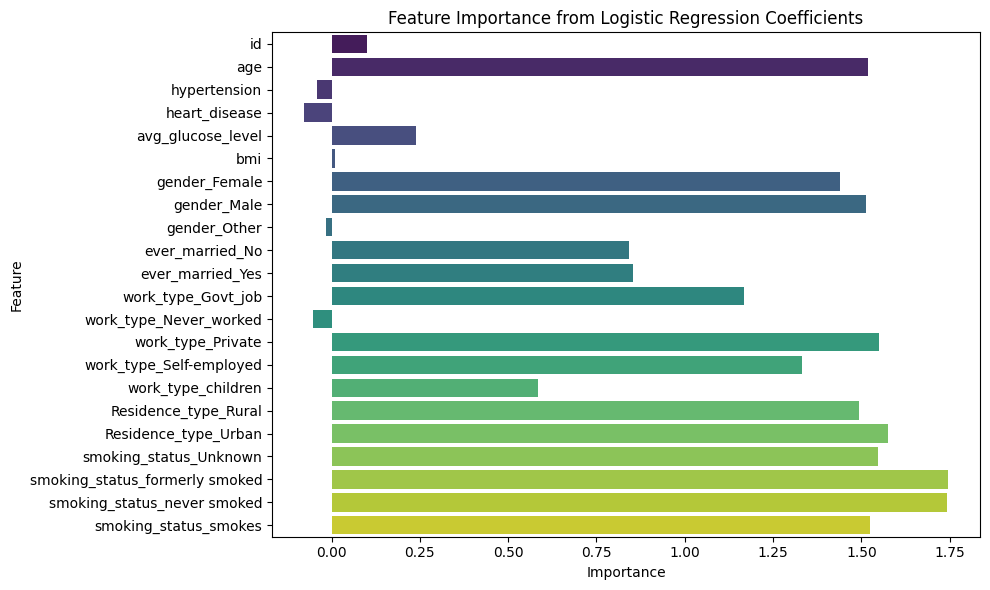

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = X_train.columns

logistic_regression_model = stroke_prediction_pipeline.named_steps['model']

coefficients = logistic_regression_model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

print("Feature Importances:\n")
for _, row in feature_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.tight_layout()
plt.show()


### SVM - Feature Importance

Feature Importances:

id: 0.0000
age: 0.0001
hypertension: -0.0000
heart_disease: 0.0000
avg_glucose_level: -0.0000
bmi: -0.0000
gender_Female: 0.9255
gender_Male: 0.9953
gender_Other: -0.0000
ever_married_No: 0.8975
ever_married_Yes: 0.7744
work_type_Govt_job: 0.7831
work_type_Never_worked: -0.0000
work_type_Private: 0.9085
work_type_Self-employed: 0.9099
work_type_children: 0.3703
Residence_type_Rural: 0.9827
Residence_type_Urban: 0.9528
smoking_status_Unknown: 0.9284
smoking_status_formerly smoked: 0.9373
smoking_status_never smoked: 0.9974
smoking_status_smokes: 0.8401


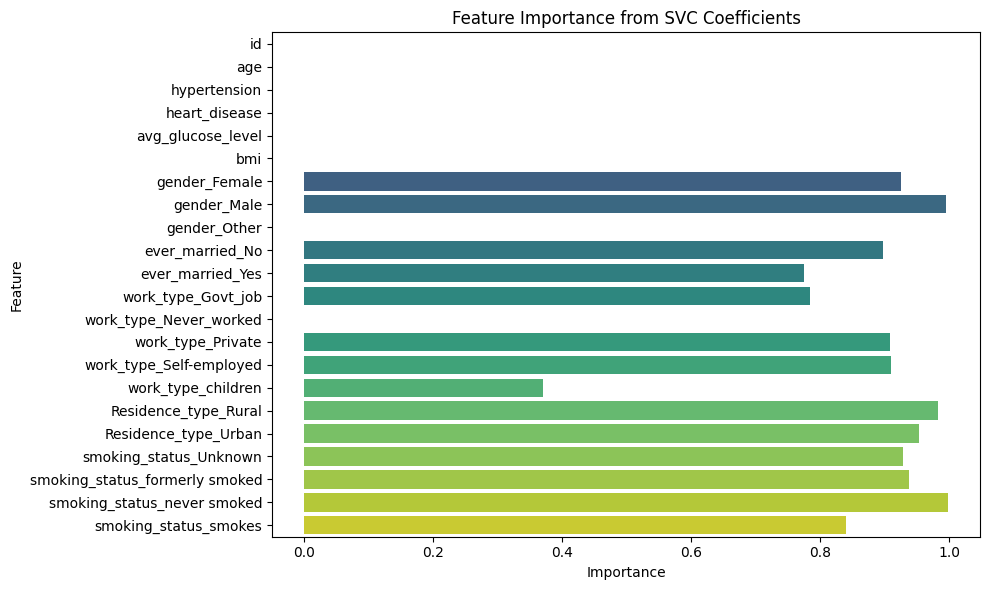

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = X_train.columns

svc_model = stroke_prediction_pipeline.named_steps['model']

coefficients = svc_model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

print("Feature Importances:\n")
for _, row in feature_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from SVC Coefficients')
plt.tight_layout()
plt.show()

### Random Forest Classifer - Feature Importance

Feature Importances:

id: 0.0701
age: 0.2411
hypertension: 0.0096
heart_disease: 0.0064
avg_glucose_level: 0.0795
bmi: 0.0604
gender_Female: 0.0484
gender_Male: 0.0502
gender_Other: 0.0000
ever_married_No: 0.0243
ever_married_Yes: 0.0597
work_type_Govt_job: 0.0248
work_type_Never_worked: 0.0000
work_type_Private: 0.0518
work_type_Self-employed: 0.0427
work_type_children: 0.0081
Residence_type_Rural: 0.0519
Residence_type_Urban: 0.0532
smoking_status_Unknown: 0.0221
smoking_status_formerly smoked: 0.0447
smoking_status_never smoked: 0.0292
smoking_status_smokes: 0.0220


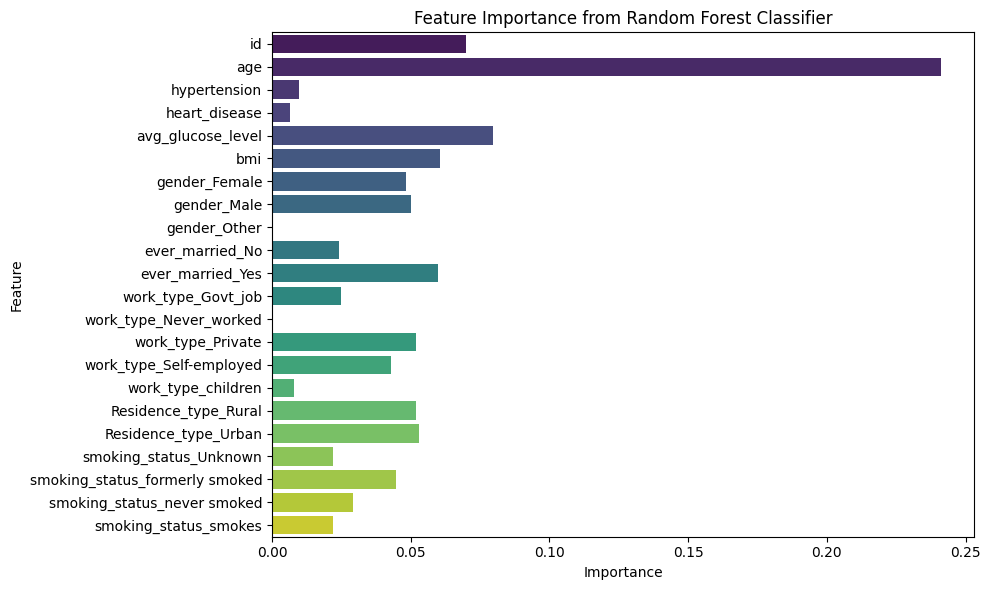

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = X_train.columns

random_forest_model = stroke_prediction_pipeline.named_steps['model']

feature_importances = random_forest_model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

print("Feature Importances:\n")
for _, row in feature_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from Random Forest Classifier')
plt.tight_layout()
plt.show()

### XGB Classifier - Feature Importance

Feature Importances:

id: 0.0092
age: 0.0848
hypertension: 0.0067
heart_disease: 0.0072
avg_glucose_level: 0.0074
bmi: 0.0059
gender_Female: 0.0838
gender_Male: 0.1227
gender_Other: 0.0000
ever_married_No: 0.0486
ever_married_Yes: 0.0417
work_type_Govt_job: 0.0636
work_type_Never_worked: 0.0000
work_type_Private: 0.0865
work_type_Self-employed: 0.0657
work_type_children: 0.0502
Residence_type_Rural: 0.1261
Residence_type_Urban: 0.0719
smoking_status_Unknown: 0.0321
smoking_status_formerly smoked: 0.0260
smoking_status_never smoked: 0.0300
smoking_status_smokes: 0.0299


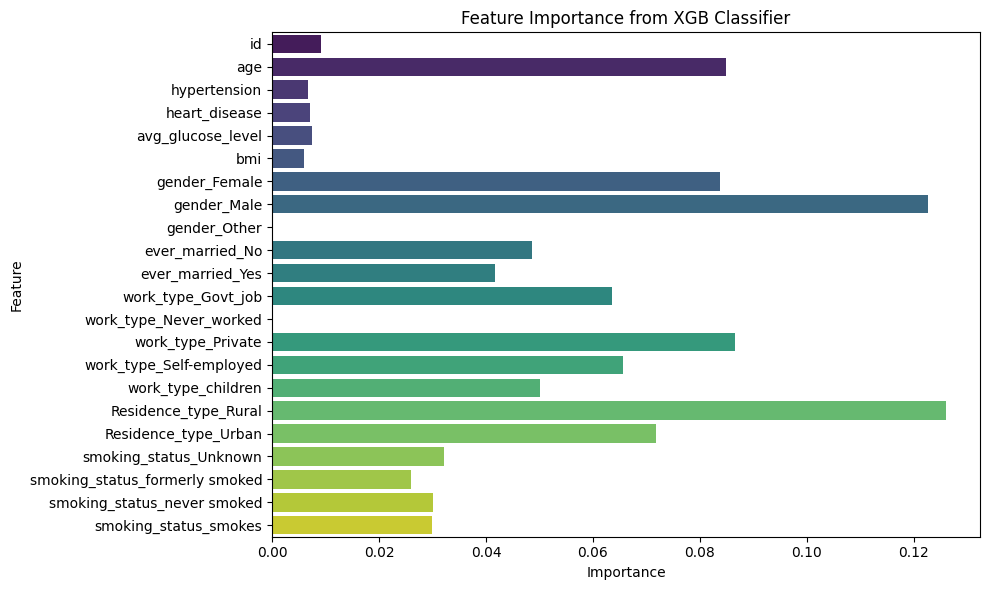

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = X_train.columns

xgb_model = stroke_prediction_pipeline.named_steps['model']

feature_importances = xgb_model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

print("Feature Importances:\n")
for _, row in feature_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from XGB Classifier')
plt.tight_layout()
plt.show()

### Decision Tree Classifier - Feature Importance

Feature Importances:

id: 0.0343
age: 0.3770
hypertension: 0.0128
heart_disease: 0.0061
avg_glucose_level: 0.0339
bmi: 0.0230
gender_Female: 0.0474
gender_Male: 0.0577
gender_Other: 0.0000
ever_married_No: 0.0382
ever_married_Yes: 0.0163
work_type_Govt_job: 0.0456
work_type_Never_worked: 0.0000
work_type_Private: 0.0789
work_type_Self-employed: 0.0531
work_type_children: 0.0005
Residence_type_Rural: 0.0492
Residence_type_Urban: 0.0252
smoking_status_Unknown: 0.0285
smoking_status_formerly smoked: 0.0216
smoking_status_never smoked: 0.0262
smoking_status_smokes: 0.0243


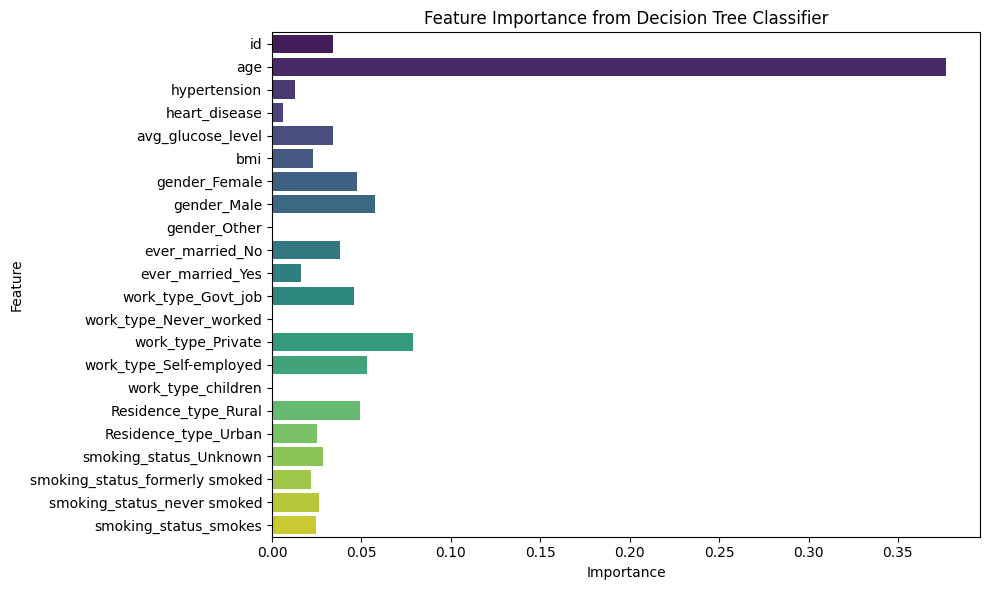

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = X_train.columns

decision_tree_model = stroke_prediction_pipeline.named_steps['model']

feature_importances = decision_tree_model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

print("Feature Importances:\n")
for _, row in feature_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from Decision Tree Classifier')
plt.tight_layout()
plt.show()

### MLP Classifier - Feature Importance

Feature Importances:

id: 0.0041
age: 0.0110
hypertension: 0.0006
heart_disease: -0.0010
avg_glucose_level: 0.0014
bmi: 0.0052
gender_Female: 0.0899
gender_Male: 0.1066
gender_Other: 0.0000
ever_married_No: 0.0686
ever_married_Yes: 0.0380
work_type_Govt_job: 0.0639
work_type_Never_worked: 0.0010
work_type_Private: 0.0962
work_type_Self-employed: 0.0842
work_type_children: 0.0071
Residence_type_Rural: 0.1089
Residence_type_Urban: 0.1164
smoking_status_Unknown: 0.0989
smoking_status_formerly smoked: 0.1033
smoking_status_never smoked: 0.1013
smoking_status_smokes: 0.0674


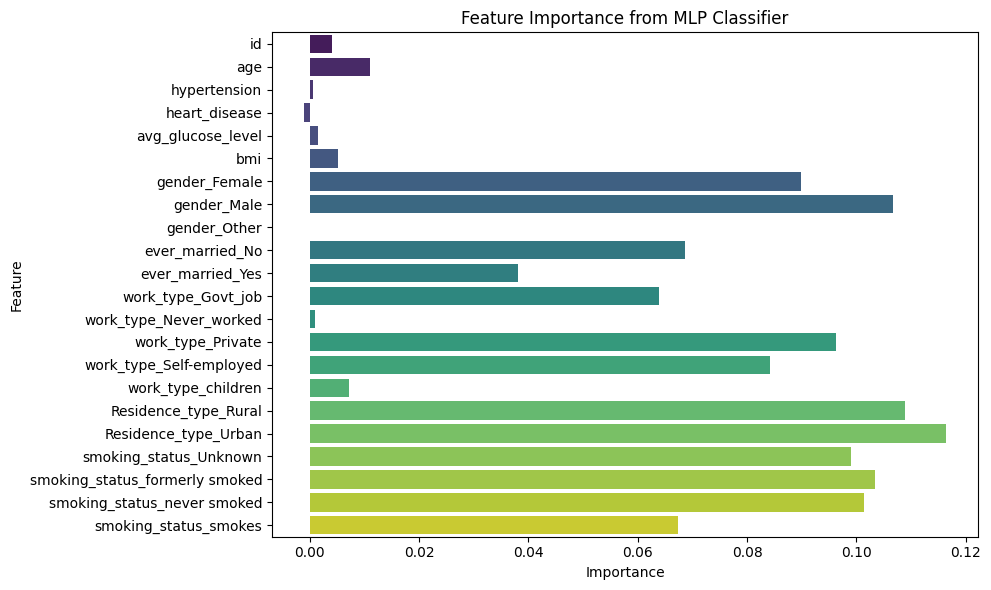

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

feature_names = X_train.columns

mlp_classifier_model = stroke_prediction_pipeline.named_steps['model']

permutation_importances = permutation_importance(mlp_classifier_model, X_test_scaled, y_test)
feature_importances = permutation_importances.importances_mean

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

print("Feature Importances:\n")
for _, row in feature_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from MLP Classifier')
plt.tight_layout()
plt.show()

## Model Insights

Across various models, age tends to be the most important feature, as shown in some feature importance plots such as Random Forest and XGBoost. This aligns with existing medicial information that stroke risk can increase as one grows older. Work type and gender also seem to have significant roles and important scores, such as in the XGBoost Model. Smoking status and residence type had a lower importance than age, for example, but still had some importance, such as in the MLP Classifier model. Smoking status and work type are examples of features and largely behavioral/economic factors that could have a stronger impact on stroke risk. Overall, there are various models that work for stroke prediction well as there are various features that play important roles to the prediction.